## 학습곡선, 검증곡선, 그리드서치

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
            'machine-learning-databases'
            '/breast-cancer-wisconsin/wdbc.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.20, stratify = y,
    random_state = 1)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state = 1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))


테스트 정확도: 0.956


In [6]:
import numpy as np
import matplotlib.pyplot as plt

### 학습 곡선으로 편향과 분산 문제 분석

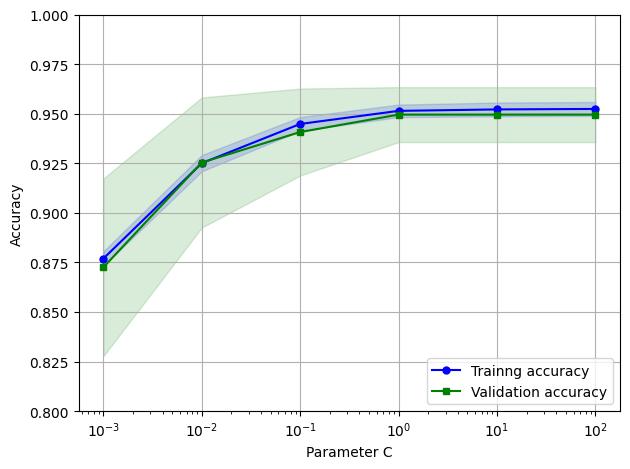

In [7]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator = pipe_lr,
    X = X_train,
    y = y_train,
    param_name = 'logisticregression__C',
    param_range = param_range,
    cv = 10
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color = 'blue', marker = 'o',
    markersize = 5, label = 'Trainng accuracy')

plt.fill_between(param_range, train_mean + train_std,
                train_mean - train_std, alpha = 0.15,
                color = 'blue')

plt.plot(param_range, test_mean, color = 'green', marker = 's',
    markersize = 5, label = 'Validation accuracy')

plt.fill_between(param_range, test_mean + test_std,
                test_mean - test_std, alpha = 0.15,
                color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

### 검증 곡선으로 과대적합과 과소적합 조사

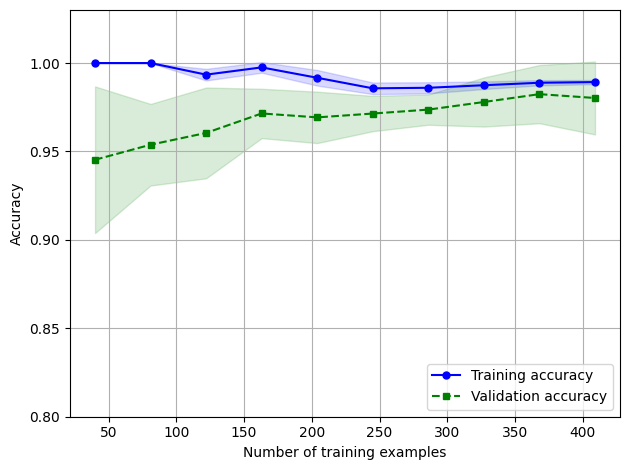

In [8]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state = 1, max_iter = 10000))

train_sizes, train_scores, test_scores =\
         learning_curve(estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        train_sizes = np.linspace(0.1, 1.0, 10),
                        cv = 10,
                        n_jobs = 1)
                                
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
        color = 'blue', marker = 'o',
        markersize = 5, label = 'Training accuracy')

plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean,
        color = 'green', linestyle = '--',
        marker = 's', markersize = 5,
        label = 'Validation accuracy')

plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## 그리드 서치를 사용한 머신러닝 모델 세부튜닝
### 그리드 서치를 사용한 하이퍼파라미터 튜닝

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                        SVC(random_state = 1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C' : param_range,
                'svc__kernel' : ['linear']},
                {'svc__C' : param_range,
                'svc__gamma' : param_range,
                'svc__kernel' : ['rbf']}]
gs = GridSearchCV(estimator = pipe_svc,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    refit = True,
                    cv = 10,
                    n_jobs = 1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [10]:
clf = gs.best_estimator_

print('테스트 정확도 : %.3f' % clf.score(X_test, y_test))

테스트 정확도 : 0.974


In [11]:
gs = GridSearchCV(estimator = pipe_svc,
                param_grid = param_grid,
                scoring = 'accuracy',
                cv = 10,
                return_train_score = True,
                n_jobs= 1)
gs = gs.fit(X_train, y_train)

In [12]:
print(gs.cv_results_['split0_train_score'])
print(gs.cv_results_['mean_train_score'])
print(gs.cv_results_['split0_test_score'])
print('테스트 정확도 : %.3f' % gs.score(X_test, y_test))

[0.6405868  0.93643032 0.97555012 0.98777506 0.98533007 0.99266504
 0.99755501 1.         0.62591687 0.62591687 0.62591687 0.62591687
 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687
 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687
 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687 0.62591687
 0.62591687 0.62591687 0.62591687 0.7799511  0.94621027 0.96577017
 0.62591687 0.62591687 0.62591687 0.62591687 0.78484108 0.94621027
 0.9804401  0.99266504 1.         1.         1.         1.
 0.94621027 0.97799511 0.99266504 1.         1.         1.
 1.         1.         0.97799511 0.98777506 0.99511002 1.
 1.         1.         1.         1.         0.98533007 0.99266504
 1.         1.         1.         1.         1.         1.        ]
[0.6402928  0.93724074 0.97240801 0.98510406 0.98803447 0.99145447
 0.99707019 0.9992677  0.62637307 0.62637307 0.62637307 0.62637307
 0.62637307 0.62637307 0.62637307 0.62637307 0.62637307 0.62637307
 0.62637307 0.6263

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

distribution = loguniform(0.0001, 1000.0)

param_dist = [{'svc__C' : distribution,
                'svc__kernel' : ['linear']},
                {'svc__C' : distribution,
                'svc__gamma' : distribution,
                'svc__kernel' : ['rbf']}]

rs = RandomizedSearchCV(estimator = pipe_svc, 
                        param_distributions = param_dist,
                        n_iter = 30, cv = 10,
                        random_state = 1,
                        n_jobs = -1)
rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)

0.9824637681159419
{'svc__C': 210.6644070836221, 'svc__gamma': 0.0006861724481510375, 'svc__kernel': 'rbf'}


## 성능 평가 지표

In [14]:
import sys

In [15]:
import pandas as pd

In [16]:
import matplotlib

In [17]:
import numpy as np

In [18]:
import scipy as sp

In [19]:
import IPython
from IPython import display

In [20]:
import sklearn

In [21]:
import random
import time

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn import *

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [25]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
%pip install pandas.tools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
import matplotlib as mpl
import matplotlib.pyplot as pyplot
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix

In [28]:
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

In [29]:
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

In [30]:
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [31]:
print(data1.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [32]:
data_val.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
data_raw.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## DATA COMPLETING

In [34]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
drop_columns = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_columns, axis = 1, inplace=True)

print(data1.isnull().sum())
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## DATA CREATE

In [35]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    # yes -> 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    dataset['Title'] = dataset['Name'].str.split(",", expand = True)\
        [1].str.split('.', expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

# cleanup rare title name
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' \
    if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print('-' * 10)

print(data_val.info())
data1.sample(10)

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  FamilySize   418 non-null    int64   
 12  IsAlone      418 non-null    int64   
 13  Title        418 non-null    object  
 14  FareBin      418 non-null    category
 15  AgeBin       418 non-null    category
dtypes: c

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
820,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,93.5000,S,3,0,Mrs,"(31.0, 512.329]","(48.0, 64.0]"
506,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26.0000,S,3,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0000,S,1,1,Misc,"(-0.001, 7.91]","(32.0, 48.0]"
377,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,211.5000,C,3,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
163,0,3,"Calic, Mr. Jovo",male,17.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
804,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,6.9750,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,79.6500,S,3,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
847,0,3,"Markoff, Mr. Marin",male,35.0,0,0,7.8958,C,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
20,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,26.0000,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"


## DATA CONVERT

In [38]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

Target = ['Survived']

data1_x = ['Sex', 'Pclass', 'Embarked','Title','SibSp','Parch',\
    'Age','Fare','FamilySize','IsAlone']
data1_x_calc = ['Sex_Code', 'Pclass','Embarked_Code','Title_Code',\
    'SibSp', 'Parch','Age','Fare']
data1_xy = Target + data1_x
print('Original X Y: ', data1_xy, '\n')

data1_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code','Title_Code',\
    'FamilySize','AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')
# bin = binary?? 대박

data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


## split data

In [40]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(\
    data1[data1_x_calc], data1[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = \
    model_selection.train_test_split(data1[data1_x_bin],\
        data1[Target], random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = \
    model_selection.train_test_split(data1_dummy[data1_x_dummy],\
        data1[Target], random_state=0)
print('Data1 Shape : {}'.format(data1.shape))
print('Train1 Shape : {}'.format(train1_x.shape))
print('Test1 Shape : {}'.format(test1_x.shape))

train1_x_bin.head()

Data1 Shape : (891, 19)
Train1 Shape : (668, 8)
Test1 Shape : (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,2,1,1,0
68,0,3,2,1,7,1,1
253,1,3,2,2,2,1,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,2,1


## Model Data

In [42]:
%pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\YHS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [43]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

In [44]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [45]:
cv_split = model_selection.ShuffleSplit(\
    n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [46]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [47]:
#create table to compare MLA predictions
MLA_predict = data1[Target]

In [50]:
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = \
        str(alg.get_params())
    
    
    cv_results = model_selection.cross_validate(\
        alg, data1[data1_x_bin], data1[Target], cv  = cv_split,\
            return_train_score = True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] \
        = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] \
        = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] \
        = cv_results['test_score'].std()*3
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index += 1

    

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], \
    ascending = False, inplace = True)
MLA_compare
# 결과가 왜 다르게 나오지??

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.829104,0.061679,0.357481
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.835019,0.827612,0.040916,0.114089
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835955,0.827239,0.040065,0.112693
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.890824,0.826493,0.049873,0.126365
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.822388,0.058638,0.348061
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.867041,0.822015,0.05131,0.248056
1,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.890824,0.821642,0.05051,0.043869
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.820896,0.054149,0.006279
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.849064,0.810448,0.079753,0.007515
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.820599,0.810075,0.047611,0.26459


## 모델평가

In [54]:
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] #survived titles

    for index, row in df.iterrows():

        #Question 1: Were you on the Titanic; majority died
        Model.loc[index, 'Predict'] = 0

        #Question 2: Are you female; majority survived
        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

        #Question 3A Female - Class and Question 4 Embarked gain minimum information

        #Question 5B Female - FareBin; set anything less than .5 in female node decision tree back to 0       
        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
                  Model.loc[index, 'Predict'] = 0

        #Question 3B Male: Title; set anything greater than .5 to 1 for majority survived
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)
            ):
            Model.loc[index, 'Predict'] = 1
        
        
    return Model


#model data
Tree_Predict = mytree(data1)

[[514  35]
 [131 211]]


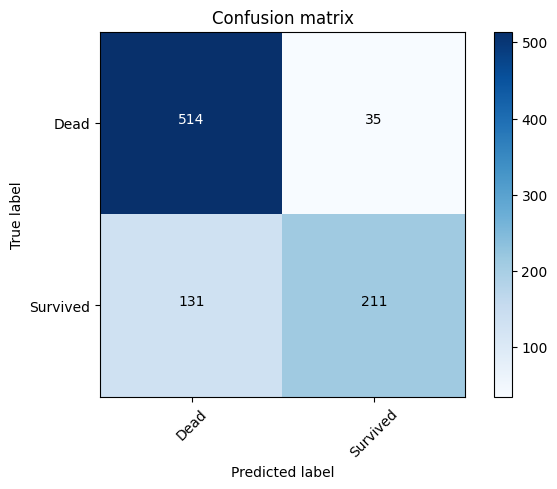

In [56]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)

## ???

# 배깅 - 부트스트랩 샘플링

# 에이다부스트
## Titanic Dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
# 결측값 -> 중앙값으로 대체
all['Age'] = all['Age'].fillna(value = all['Age'].median())
all['Fare'] = all['Fare'].fillna(value = all['Age'].median())
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


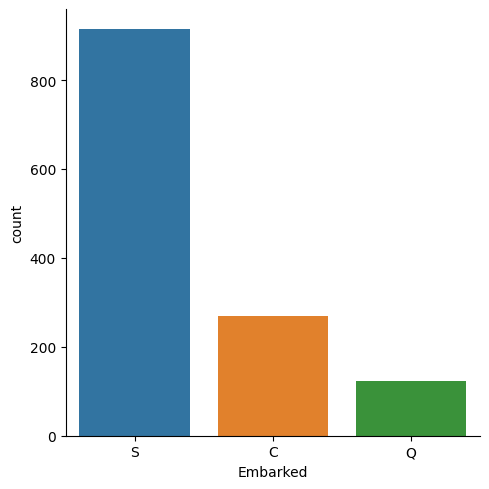

In [14]:
sns.catplot(x = 'Embarked', kind = 'count', data = all)

In [15]:
all['Embarked'] = all['Embarked'].fillna("S")
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [16]:
all.loc[ all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[ all['Age'] > 64, 'Age'] = 4

In [19]:
import re
def get_title(name):
    title_search = re.search('([A-Za-z]+\.)', name)

    if title_search:
        return title_search.group(1)
    return ""

In [20]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [21]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [22]:
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
# 알파벳 앞글자만 따서 특성 이름으로
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [23]:
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,M,S,Mr.,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,M,S,Miss.,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,M,S,Mr.,1,1


In [24]:
all_1 = all.drop(['Name', 'Ticket'], axis = 1)
all_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,male,1.0,1,0,7.2500,M,S,Mr.,2,0
1,2,1.0,1,female,2.0,1,0,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,female,1.0,0,0,7.9250,M,S,Miss.,1,1
3,4,1.0,1,female,2.0,1,0,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,male,2.0,0,0,8.0500,M,S,Mr.,1,1


In [26]:
# 텍스트 특성을 컬럼명으로 올려버림 -> 정수로만 표현할 수 있도록
# Sex = male을 Sex_male = 1(맞음) 으로! 
all_dummies = pd.get_dummies(all_1, drop_first = True)
all_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_male,...,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,1,0.0,3,1.0,1,0,7.2500,2,0,1,...,1,0,0,1,0,0,1,0,0,0
1,2,1.0,1,2.0,1,0,71.2833,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,3,1.0,0,0,7.9250,1,1,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1.0,1,2.0,1,0,53.1000,2,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,2.0,0,0,8.0500,1,1,1,...,1,0,0,1,0,0,1,0,0,0


In [27]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Family_Size     891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_male        891 non-null    uint8  
 10  Cabin_B         891 non-null    uint8  
 11  Cabin_C         891 non-null    uint8  
 12  Cabin_D         891 non-null    uint8  
 13  Cabin_E         891 non-null    uint8  
 14  Cabin_F         891 non-null    uint8  
 15  Cabin_G         891 non-null    uint8  
 16  Cabin_M         891 non-null    uint8  
 17  Cabin_T         891 non-null    uin

In [28]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()
# 생존 알수없는 데이터를 테스트데이터로 설정

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Survived        0 non-null      float64
 2   Pclass          418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Fare            418 non-null    float64
 7   Family_Size     418 non-null    int64  
 8   IsAlone         418 non-null    int64  
 9   Sex_male        418 non-null    uint8  
 10  Cabin_B         418 non-null    uint8  
 11  Cabin_C         418 non-null    uint8  
 12  Cabin_D         418 non-null    uint8  
 13  Cabin_E         418 non-null    uint8  
 14  Cabin_F         418 non-null    uint8  
 15  Cabin_G         418 non-null    uint8  
 16  Cabin_M         418 non-null    uint8  
 17  Cabin_T         418 non-null    uin

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(\
    all_train.drop(['PassengerId', 'Survived'], axis=1),
    all_train['Survived'],
    test_size = 0.30, random_state = 101, 
    stratify = all_train['Survived'])

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(),\
    n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [35]:
prediction = ada.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       165
         1.0       0.76      0.63      0.69       103

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.78      0.78      0.78       268



In [39]:
print (f'Train Accuracy - : {ada.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(X_test,y_test):.3f}')

Train Accuracy - : 0.961
Test Accuracy - : 0.780


In [41]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)
t_pred = ada.predict(TestForPred).astype(int)
PassengerId = all_test['PassengerId']
adaSub = pd.DataFrame({'PassengerId' : PassengerId, 'Survived' : t_pred})
adaSub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,0


## 왜 결과가 다르게 나오지??